In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("zoo.csv")

In [3]:
data=pd.DataFrame(data)

In [4]:
data

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
x=data.iloc[:,1:17]

In [7]:
y=data.iloc[:,17]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,train_size=0.8,test_size=0.2)

In [10]:
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [11]:
model=tree.DecisionTreeClassifier()

In [12]:
m1=model.fit(x_tr,y_tr)

In [13]:
m1_pred=m1.predict(x_te)

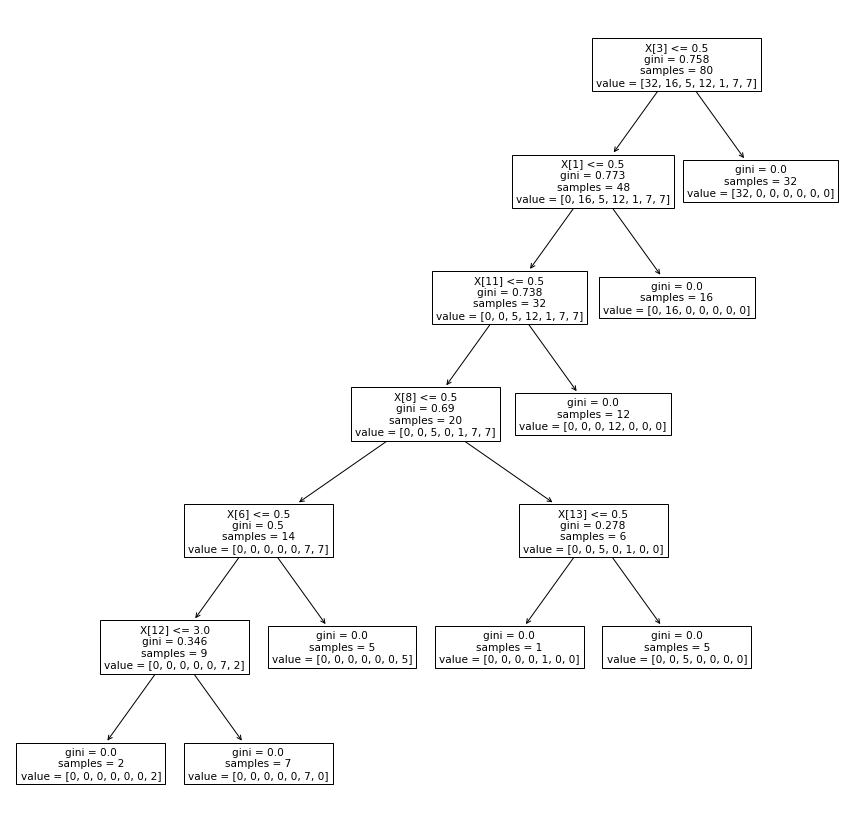

In [14]:
plt.figure(figsize=(15,15))
tree.plot_tree(m1)
plt.show()

## Report

In [21]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

In [22]:
print(classification_report(y_te,m1_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         1
           7       0.75      1.00      0.86         3

    accuracy                           0.90        21
   macro avg       0.68      0.67      0.67        21
weighted avg       0.92      0.90      0.90        21



In [23]:
print(confusion_matrix(m1_pred,y_te))

[[9 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 1 3]]


In [24]:
print(accuracy_score(m1_pred,y_te))

0.9047619047619048
